# Handling Missing Values in Data

---

## 1. Overview

Missing data is a common issue in real-world datasets that can affect the quality of analysis and model performance.  
This notebook covers basic techniques to identify, analyse, and handle missing values using Python.  

Key topics include:  
- Types of missing data (MCAR, MAR, MNAR)  
- Detecting missing values  
- Simple imputation methods (mean, median, mode)  
- Advanced imputation methods (KNN, regression)  
- Dropping missing data  
- Considerations and best practices  

---

## 2. Types of Missing Data

Missing data can be classified into three types, important for deciding how to handle them:

- **MCAR (Missing Completely At Random):** Missingness unrelated to any data.  
- **MAR (Missing At Random):** Missingness related to observed data, but not to missing values themselves.  
- **MNAR (Missing Not At Random):** Missingness related to the missing values themselves.  

Understanding these helps select appropriate imputation methods.

## 3. Detecting Missing Values

We first detect where and how much data is missing.

- Use `pandas` functions like `.isnull()` and `.sum()` to count missing values.  
- Visualise missingness with heatmaps or bar charts to understand patterns.

    Age  Gender   Income        City
0  25.0    Male  50000.0      London
1  30.0  Female  60000.0  Manchester
2   NaN  Female  55000.0     Bristol
3  22.0     NaN  52000.0      London
4  28.0    Male      NaN     Bristol
5   NaN  Female  58000.0         NaN
6  35.0     NaN  60000.0  Manchester
Age       2
Gender    2
Income    1
City      1
dtype: int64


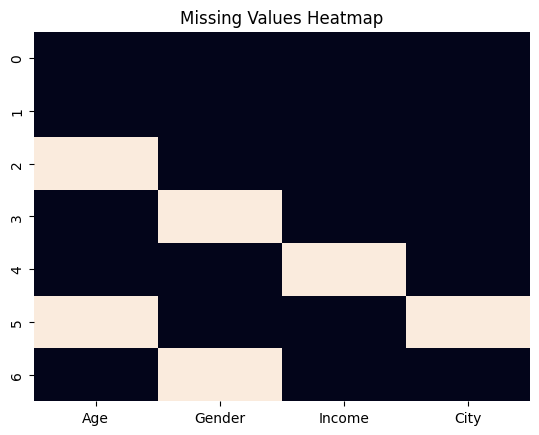

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Age': [25, 30, np.nan, 22, 28, np.nan, 35],
    'Gender': ['Male', 'Female', 'Female', np.nan, 'Male', 'Female', np.nan],
    'Income': [50000, 60000, 55000, 52000, np.nan, 58000, 60000],
    'City': ['London', 'Manchester', 'Bristol', 'London', 'Bristol', np.nan, 'Manchester']
}

df = pd.DataFrame(data)
print(df)


# Check missing values per column
print(df.isnull().sum())

# Visualise missing data pattern
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

## 4. Dropping Missing Data

Dropping rows or columns containing missing values can be a simple and effective way to handle missing data, especially when the proportion of missing values is small or those features are not important.

In [3]:
 # Drop rows with any missing values
df_drop_rows = df.dropna()

# Drop columns where more than 50% of values are missing
df_drop_cols = df.dropna(axis=1, thresh=int(len(df) * 0.5))

## 5. Simple Imputation Methods

Simple imputation fills missing values using summary statistics like mean, median, or mode. It is easy to implement but may not capture complex data patterns.

- Mean imputation for numeric data  
- Median imputation (more robust to outliers)  
- Mode imputation for categorical data

In [ ]:
# Fill missing numeric values (Age) with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing categorical values (Gender) with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

## 6. Advanced Imputation Methods

More sophisticated methods use models or similarity to predict missing values:

- K-Nearest Neighbors (KNN) imputation: imputes missing values based on similar samples  
- Regression imputation: predicts missing values using regression models trained on other features


In [7]:
from sklearn.impute import KNNImputer

# Select numerical columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[num_cols]

# Apply KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=num_cols)

# Replace numerical columns in original dataframe
df[num_cols] = df_num_imputed

## 7. When Not to Impute

Imputation is not always appropriate:

- If data is MNAR (missing not at random), imputation can introduce bias  
- Features with very high missing rates may be better dropped  
- Always consider domain knowledge and data context before imputing

---

## 8. Summary

- Missing values are common in real datasets and must be handled carefully  
- Detect missing data patterns with pandas and visualization  
- Dropping data is simple but can lose information  
- Simple imputation is easy but limited  
- Advanced methods improve quality but add complexity  
- Understand your data and document all steps clearly for reproducibility  